## PXRD transformations

In [1]:
from decifer.utility import pxrd_from_cif
from decifer.decifer_dataset import DeciferDataset

import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
random.seed(100)
dataset_path = '../../../phd_projects/deCIFer/data/crystallm/full/serialized/train.h5'
dataset = DeciferDataset(dataset_path, ["cif_name", "cif_tokens", "xrd.q", "xrd.iq", "cif_string", "spacegroup"])
datapoint_1 = random.choice(dataset)
datapoint_2 = random.choice(dataset)

In [3]:
sample_cif = datapoint_1['cif_string']
sample_tokens = datapoint_1['cif_tokens']
sample_cif_2 = datapoint_2['cif_string']
sample_tokens_2 = datapoint_2['cif_tokens']

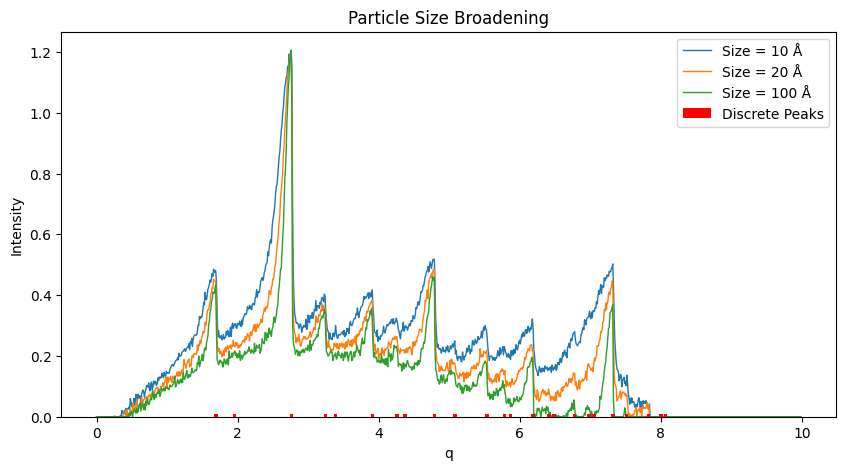

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

# --- 2. Particle Size Broadening ---
for ps in [10, 20, 100]:
    res = pxrd_from_cif(
        sample_cif, 
        particle_size=ps,
        base_fwhm=0.1,
        peak_asymmetry=0.9,
        noise= 0.01,
        preferred_orientation_range = (0.9, 0.9),
        chebychev_norm_coeffs= [-0.1, -0.1, 0.1],
        chebychev_order=3,
        debug=True
)
    ax.plot(res['q'], res['iq'], lw=1, label=f"Size = {ps} Å")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
ax.bar(q_disc, np.ones_like(iq_disc)*0.01, color='red', width=0.05, zorder=5, label="Discrete Peaks")
ax.set_title("Particle Size Broadening")
ax.set_xlabel("q")
ax.set_ylabel("Intensity")
ax.legend()

plt.show()

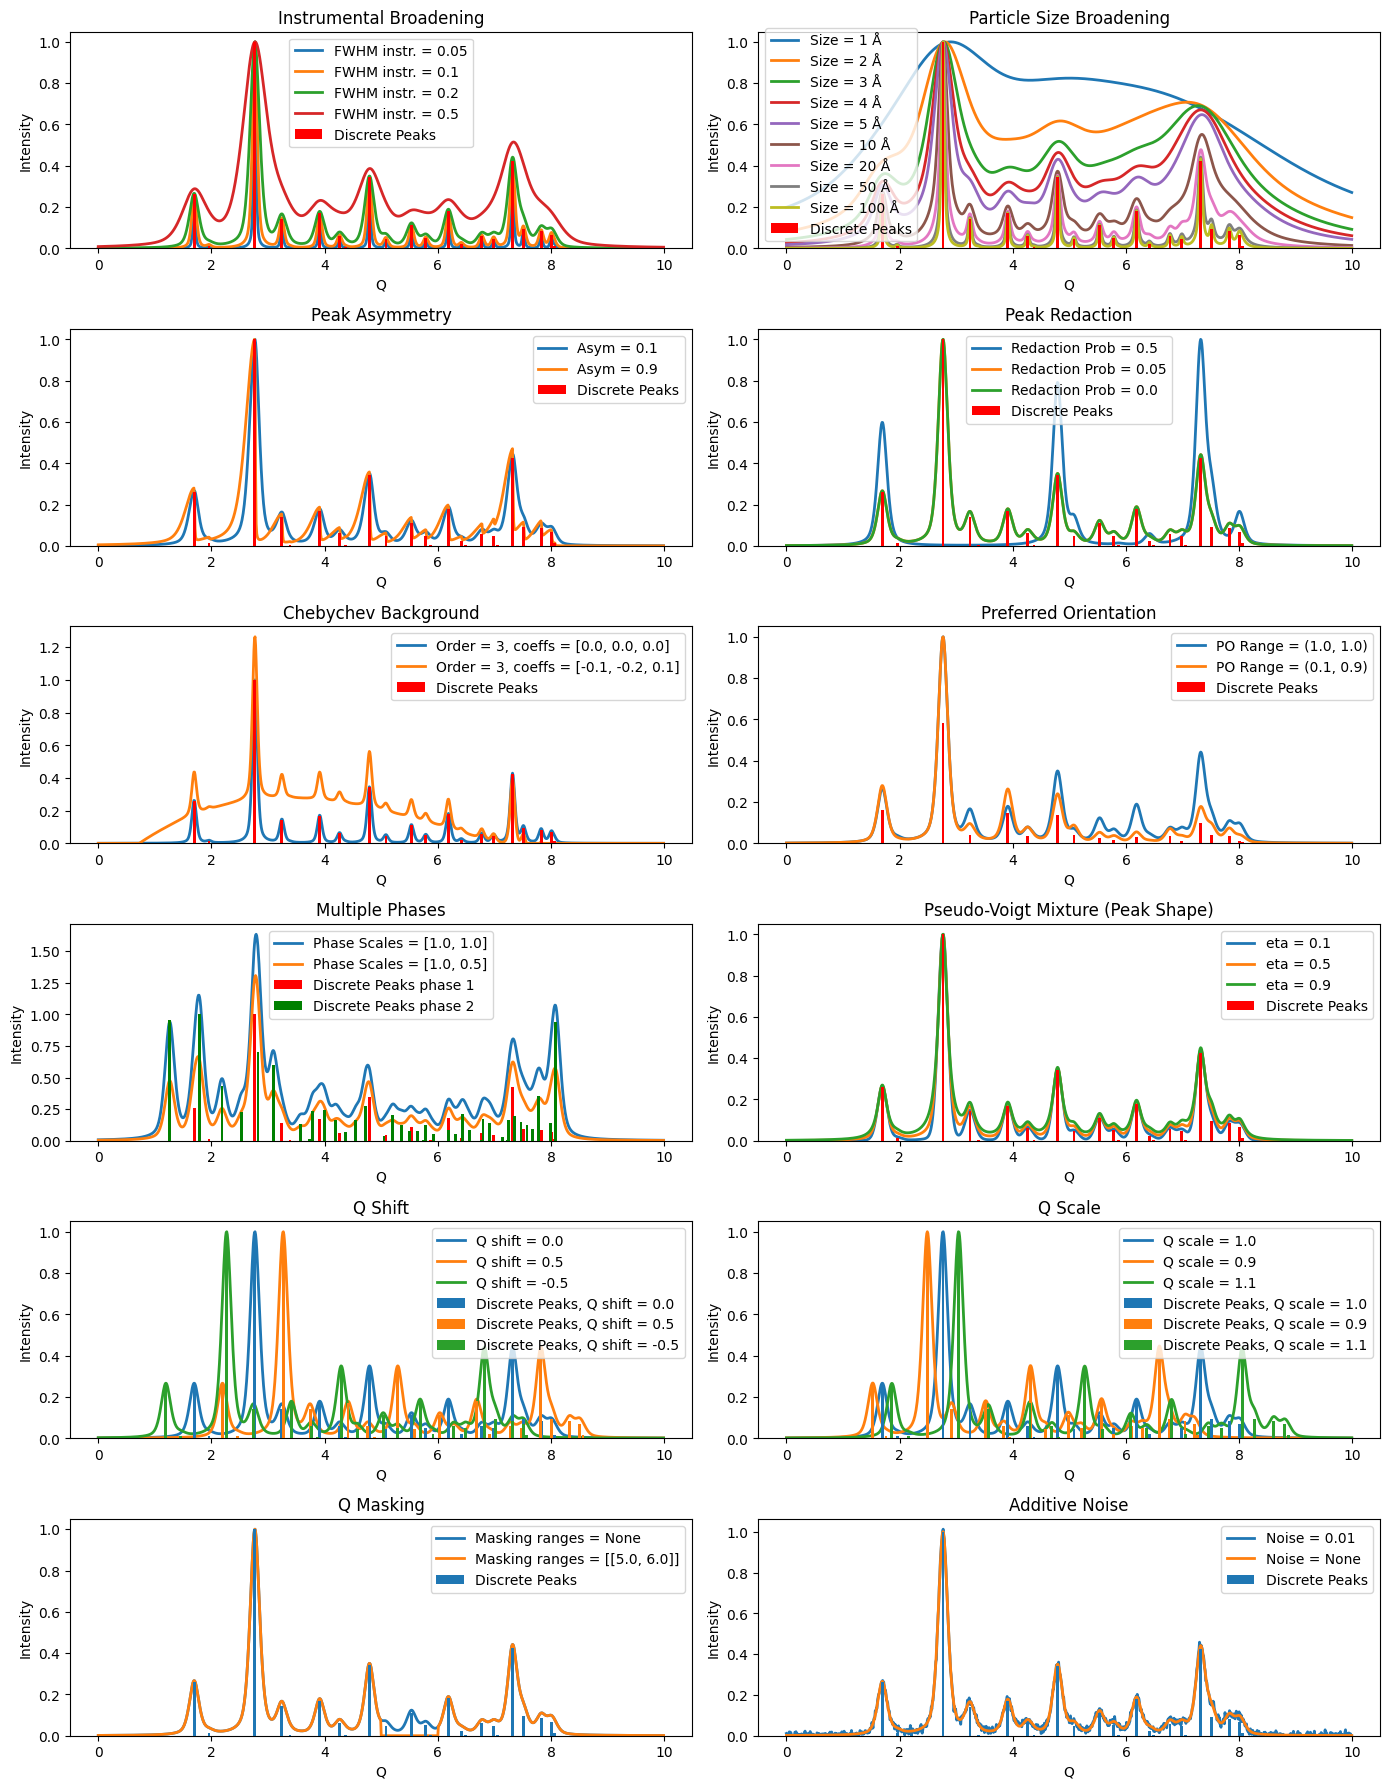

In [15]:
# Create a figure with 8 subplots (4 rows x 2 columns)
fig, axs = plt.subplots(6, 2, figsize=(14, 18))
axs = axs.flatten()

# --- 1. Base Broadnening ---
for fwhm in [0.05, 0.1, 0.2, 0.5]:
    res_base = pxrd_from_cif(sample_cif, base_fwhm=fwhm, debug=True)
    axs[0].plot(res_base['q'], res_base['iq'], lw=2, label=f"FWHM instr. = {fwhm}")
q_disc = res_base['q_disc'][0]
iq_disc = res_base['iq_disc'][0]
axs[0].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[0].set_title("Instrumental Broadening")
axs[0].set_xlabel("Q")
axs[0].set_ylabel("Intensity")
axs[0].legend()

# --- 2. Particle Size Broadening ---
for ps in [1, 2, 3, 4, 5, 10, 20, 50, 100]:
    res = pxrd_from_cif(sample_cif, particle_size=ps, debug=True)
    axs[1].plot(res['q'], res['iq'], lw=2, label=f"Size = {ps} Å")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[1].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[1].set_title("Particle Size Broadening")
axs[1].set_xlabel("Q")
axs[1].set_ylabel("Intensity")
axs[1].legend()

# --- 3. Peak Asymmetry ---
for asym in [0.1, 0.9]:
    res = pxrd_from_cif(sample_cif, peak_asymmetry=asym, base_fwhm=0.2, debug=True)
    axs[2].plot(res['q'], res['iq'], lw=2, label=f"Asym = {asym}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[2].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[2].set_title("Peak Asymmetry")
axs[2].set_xlabel("Q")
axs[2].set_ylabel("Intensity")
axs[2].legend()

# --- 4. Peak Redaction ---
for red_prob in [0.5, 0.05, 0.0]:
    res = pxrd_from_cif(sample_cif, peak_redaction_prob=red_prob, base_fwhm=0.2, debug=True)
    axs[3].plot(res['q'], res['iq'], lw=2, label=f"Redaction Prob = {red_prob}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[3].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[3].set_title("Peak Redaction")
axs[3].set_xlabel("Q")
axs[3].set_ylabel("Intensity")
axs[3].legend()

# --- 5. Chebychev Background ---
for params in [
    {"chebychev_order": 3, "chebychev_norm_coeffs": [0.0, 0.0, 0.0]},
    {"chebychev_order": 3, "chebychev_norm_coeffs": [-0.1, -0.2, 0.1]}
]:
    res = pxrd_from_cif(sample_cif, **params, base_fwhm=0.1, debug=True)
    label = f"Order = {params['chebychev_order']}, coeffs = {params['chebychev_norm_coeffs']}"
    axs[4].plot(res['q'], res['iq'], lw=2, label=label)
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[4].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[4].set_title("Chebychev Background")
axs[4].set_xlabel("Q")
axs[4].set_ylabel("Intensity")
axs[4].legend()

# --- 6. Preferred Orientation ---
for po_range in [(1.0, 1.0), (0.1, 0.9)]:
    res = pxrd_from_cif(sample_cif, preferred_orientation_range=po_range, base_fwhm=0.2, debug=True)
    axs[5].plot(res['q'], res['iq'], lw=2, label= f"PO Range = {po_range}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[5].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[5].set_title("Preferred Orientation")
axs[5].set_xlabel("Q")
axs[5].set_ylabel("Intensity")
axs[5].legend()

# --- 7. Multiple Phases ---
for scales in [[1.0, 1.0], [1.0, 0.5]]:
    res = pxrd_from_cif([sample_cif, sample_cif_2], phase_scales=scales, base_fwhm=0.2, debug=True)
    axs[6].plot(res['q'], res['iq'], lw=2, label=f"Phase Scales = {scales}")

q_disc_1 = res['q_disc'][0]
iq_disc_1 = res['iq_disc'][0]
q_disc_2 = res['q_disc'][1]
iq_disc_2 = res['iq_disc'][1]
axs[6].bar(q_disc_1, iq_disc_1/100, color='red', width=0.05, zorder=5, label="Discrete Peaks phase 1")
axs[6].bar(q_disc_2, iq_disc_2/100, color='green', width=0.05, zorder=5, label="Discrete Peaks phase 2")
axs[6].set_title("Multiple Phases")
axs[6].set_xlabel("Q")
axs[6].set_ylabel("Intensity")
axs[6].legend()

# --- 8. PV Mixture on Peak Shape ---
for eta in [0.1, 0.5, 0.9]:
    res = pxrd_from_cif(sample_cif, eta=eta, base_fwhm=0.2, debug=True)
    axs[7].plot(res['q'], res['iq'], lw=2, label= f"eta = {eta}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[7].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[7].set_title("Pseudo-Voigt Mixture (Peak Shape)")
axs[7].set_xlabel("Q")
axs[7].set_ylabel("Intensity")
axs[7].legend()

# --- 9. Shift in Q ---
for q_shift in [0.0, 0.5, -0.5]:
    res = pxrd_from_cif(sample_cif, q_shift=q_shift, base_fwhm=0.2, debug=True)
    axs[8].plot(res['q'], res['iq'], lw=2, label=f"Q shift = {q_shift}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
    axs[8].bar(q_disc, iq_disc/100, width=0.05, zorder=5, label=f"Discrete Peaks, Q shift = {q_shift}")
axs[8].set_title("Q Shift")
axs[8].set_xlabel("Q")
axs[8].set_ylabel("Intensity")
axs[8].legend()

# --- 10. Scale in Q ---
for q_scale in [1.0, 0.9, 1.1]:
    res = pxrd_from_cif(sample_cif, q_scale=q_scale, base_fwhm=0.2, debug=True)
    axs[9].plot(res['q'], res['iq'], lw=2, label=f"Q scale = {q_scale}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
    axs[9].bar(q_disc, iq_disc/100, width=0.05, zorder=5, label=f"Discrete Peaks, Q scale = {q_scale}")
axs[9].set_title("Q Scale")
axs[9].set_xlabel("Q")
axs[9].set_ylabel("Intensity")
axs[9].legend()

# --- 11. Masking ---
for m_ranges in [None, [[5.0, 6.0]]]:
    res = pxrd_from_cif(sample_cif, mask_ranges=m_ranges, base_fwhm=0.2, debug=True)
    axs[10].plot(res['q'], res['iq'], lw=2, label=f"Masking ranges = {m_ranges}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[10].bar(q_disc, iq_disc/100, width=0.05, zorder=5, label=f"Discrete Peaks")
axs[10].set_title("Q Masking")
axs[10].set_xlabel("Q")
axs[10].set_ylabel("Intensity")
axs[10].legend()

# --- 12. Masking ---
for noise in [0.01, None]:
    res = pxrd_from_cif(sample_cif, noise=noise, base_fwhm = 0.2, debug=True)
    axs[11].plot(res['q'], res['iq'], lw=2, label=f"Noise = {noise}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[11].bar(q_disc, iq_disc/100, width=0.05, zorder=5, label=f"Discrete Peaks")
axs[11].set_title("Additive Noise")
axs[11].set_xlabel("Q")
axs[11].set_ylabel("Intensity")
axs[11].legend()


plt.tight_layout()
plt.show()

In [31]:
from decifer.decifer_model import Decifer
from bin.evaluate import load_model_from_checkpoint, extract_prompt
from bin.train import TrainConfig
from decifer.utility import (
    generate_continuous_xrd_from_cif,
    replace_symmetry_loop_with_P1,
    extract_space_group_symbol,
    reinstate_symmetry_loop,
    is_space_group_consistent,
    is_atom_site_multiplicity_consistent,
    is_formula_consistent,
    bond_length_reasonableness_score,
)

from decifer.tokenizer import Tokenizer
import torch

import crystal_toolkit
from pymatgen.vis.structure_chemview import quick_view
from pymatgen.core import Structure
from pymatgen.analysis.structure_matcher import StructureMatcher
from itertools import product
    
from tqdm.notebook import tqdm
from scipy.stats import wasserstein_distance

PADDING_ID = Tokenizer().padding_id
START_ID = Tokenizer().token_to_id["data_"]
DECODE = Tokenizer().decode

In [20]:
# Load model
model_path = "../../../phd_projects/deCIFer/experiments/model__conditioned_mlp_augmentation__context_3076__robust_full_trainingcurves/ckpt.pt"
model = load_model_from_checkpoint(model_path, device='cuda')

number of total non-trainable parameters: 26.14M
number of total trainable parameters: 27.72M
number of total conditioning MLP parameters: 0.78M


In [21]:
# def experiment(cif_sample, params_dict, model, n_repeats=1, cif_sample_other=None):
#     """
#     Run an experiment by generating PXRD patterns and corresponding CIF outputs over a set of parameters.
#     Additionally, compare the generated structure with the reference structure using StructureMatcher
#     and compare the PXRD peaks to obtain a peak similarity measure.
    
#     Args:
#         cif_sample (str): The baseline CIF string.
#         params_dict (dict): Dictionary where each key is a parameter name for pxrd_from_cif and the value is a list of values.
#         model: The generative model with a generate_custom() method.
#         n_repeats (int, optional): Number of repeats per parameter combination.
#         cif_sample_other (str, optional): An alternative CIF (for multi-phase experiments).
    
#     Returns:
#         dict: Dictionary with keys for each parameter combination and a list of experiment results.
#               Each result contains the PXRD data, conditional vector, generated CIF, generated structure,
#               reference structure, structure matching result, and a peak similarity metric.
#     """
#     results = {}
#     param_keys = list(params_dict.keys())
#     # Set up the StructureMatcher with the desired tolerances.
#     matcher = StructureMatcher(stol=0.5, angle_tol=10, ltol=0.3)

#        # Create a list of all parameter combinations.
#     combos = list(product(*[params_dict[key] for key in param_keys]))
#     total_combos = len(combos)
#     combo_index = 0

#     for combo in combos:
#         combo_index += 1
#         param_combo = dict(zip(param_keys, combo))
#         combo_key = "_".join(f"{key}-{val}" for key, val in param_combo.items())
#         print(f"Processing parameter combination {combo_index}/{total_combos}: {combo_key}")
#         results[combo_key] = []
        
#         for repeat in range(n_repeats):
#             print(f"  Processing repeat {repeat+1}/{n_repeats}")
#             # Use a multi-phase input if cif_sample_other is provided.
#             cif_input = [cif_sample, cif_sample_other] if cif_sample_other is not None else cif_sample
            
#             # Generate the PXRD from the input structure(s).
#             pxrd_ref = pxrd_from_cif(cif_input, debug=True, **param_combo)
            
#             # Convert the continuous PXRD intensity to a conditional vector.
#             cond_vec = torch.from_numpy(pxrd_ref['iq']).unsqueeze(0).to('cuda')
            
#             # Use the model to generate a new CIF.
#             generated = model.generate_custom(
#                 idx=torch.tensor([START_ID]).unsqueeze(0).to('cuda'),
#                 max_new_tokens=3076,
#                 cond_vec=cond_vec,
#                 start_indices_batch=[[0]],
#                 disable_pbar = True,
#             ).cpu().numpy()
            
#             # Remove padding and decode the generated tokens.
#             generated = [ids[ids != PADDING_ID] for ids in generated]
#             cif_string_gen = DECODE(generated[0])
            
#             # Fix potential symmetry issues.
#             cif_string_gen = replace_symmetry_loop_with_P1(cif_string_gen)
#             spacegroup_symbol = extract_space_group_symbol(cif_string_gen)
#             if spacegroup_symbol != "P 1":
#                 cif_string_gen = reinstate_symmetry_loop(cif_string_gen, spacegroup_symbol)
            
#             # Build the generated structure.
#             structure_gen = Structure.from_str(cif_string_gen, fmt="cif")
#             # Build the reference structure from the input CIF.
#             structure_ref = Structure.from_str(cif_sample, fmt="cif")
            
#             # Compare the structures.
#             structure_match = matcher.fit(structure_ref, structure_gen)
            
#             # Compute a PXRD for the generated CIF using the same parameters.
#             pxrd_gen = pxrd_from_cif(cif_string_gen, debug=True, **param_combo)
            
#             # Compute a peak similarity measure between the continuous PXRD intensities.
#             # (Here we use the Pearson correlation coefficient between the "iq" arrays.)
#             peak_similarity = np.corrcoef(pxrd_ref['iq'], pxrd_gen['iq'])[0, 1]
            
#             # Residual weighted profile
#             pxrd_ref_clean = pxrd_from_cif(cif_input, debug=True)
#             pxrd_gen_clean = pxrd_from_cif(cif_string_gen, debug=True)
#             rwp = np.sqrt(np.sum(np.square(pxrd_ref_clean['iq'] - pxrd_gen_clean['iq'])) / np.sum(np.square(pxrd_ref_clean['iq'])))
            
#             # WD
# #             wd_value = wasserstein_distance(
# #                 pxrd_ref_clean['q_disc'],
# #                 pxrd_gen_clean['q_disc'], 
# #                 u_weights=np.array(pxrd_ref_clean['iq_disc'])/100, 
# #                 v_weights= np.array(pxrd_gen_clean['iq_disc'])/100,
# #             )
#             wd_value = 0 
            
#             # Validity
#             form = is_formula_consistent(cif_string_gen)
#             sg = is_space_group_consistent(cif_string_gen)
#             mplt = is_atom_site_multiplicity_consistent(cif_string_gen)
#             bond = bond_length_reasonableness_score(cif_string_gen) >= 1.0
#             val = form and sg and mplt and bond
            
#             # Save the experiment result.
#             exp_result = {
#                 "params": param_combo,
#                 "repeat": repeat,
#                 "pxrd_ref": pxrd_ref,                     # PXRD from the input structure(s)
#                 "pxrd_gen": pxrd_gen,                     # PXRD from the generated CIF
#                 "cond_vec": cond_vec,                     # Conditional vector passed to the model
#                 "generated_cif": cif_string_gen,          # Generated CIF string
#                 "generated_structure": structure_gen,
#                 "reference_structure": structure_ref,
#                 "structure_match": structure_match,       # Boolean: True if structures match
#                 "peak_similarity": peak_similarity,        # Pearson correlation (1 means perfect match)
#                 "rwp": rwp,
#                 "wd": wd_value,
#                 "val": val,
#             }
#             results[combo_key].append(exp_result)
    
#     return results

In [35]:
def experiment(cif_sample, cif_tokens, params_dict, model, n_repeats=1, cif_sample_other=None,
               add_composition=True, add_spacegroup=False,
               max_new_tokens=3076, temperature=1.0, top_k=None):
    """
    Run an experiment by generating PXRD patterns and corresponding CIF outputs over a set of parameters.
    Now uses batched generation (using generate_batched_reps) and an optional prompt.
    The prompt is extracted once via extract_prompt and then repeated to form a batch.
    
    Args:
        cif_sample (str): The baseline CIF string.
        params_dict (dict): Dictionary where each key is a parameter name for pxrd_from_cif and the value is a list of values.
        model: The generative model with a generate_batched_reps() method.
        n_repeats (int, optional): Number of repeats (batch size) per parameter combination.
        cif_sample_other (str, optional): An alternative CIF (for multi-phase experiments).
        prompt_tokens (tensor or list, optional): A single prompt token sequence (or list of tokens, which will be ignored if list)
            used to condition generation. If provided, extract_prompt is used on it and then repeated for all repeats.
        add_composition (bool): Whether to add composition info to the prompt.
        add_spacegroup (bool): Whether to add spacegroup info to the prompt.
        max_new_tokens (int): Maximum new tokens to generate.
        temperature (float): Temperature parameter for generation.
        top_k (int): Top-K filtering parameter.
    
    Returns:
        dict: Dictionary with keys for each parameter combination and a list of experiment results.
              Each result contains the PXRD data (for input and generated CIFs), conditional vector, generated CIF,
              generated structure, reference structure, structure matching result, peak similarity, RWP, WD, and validity.
    """
    results = {}
    param_keys = list(params_dict.keys())
    matcher = StructureMatcher(stol=0.5, angle_tol=10, ltol=0.3)
    
    combos = list(product(*[params_dict[key] for key in param_keys]))
    total_combos = len(combos)
    combo_index = 0
    
    tokenizer = Tokenizer()

    for combo in combos:
        combo_index += 1
        param_combo = dict(zip(param_keys, combo))
        combo_key = "_".join(f"{key}-{val}" for key, val in param_combo.items())
        print(f"Processing parameter combination {combo_index}/{total_combos}: {combo_key}")
        results[combo_key] = []
        
        # Generate the reference PXRD.
        cif_input = [cif_sample, cif_sample_other] if cif_sample_other is not None else cif_sample
        pxrd_ref = pxrd_from_cif(cif_input, debug=True, **param_combo)
        
        # Build the conditional vector from the continuous PXRD intensity.
        cond_vec = torch.from_numpy(pxrd_ref['iq']).unsqueeze(0).to(model.device)
        cond_vec = cond_vec.repeat(n_repeats, 1)
        
        # Extract prompt
        prompt_batch = extract_prompt(
            cif_tokens,
            device=model.device,
            add_composition=add_composition,
            add_spacegroup=add_spacegroup
        ).unsqueeze(0).repeat(n_repeats, 1)
   
        # Batched generation.
        try:
            generated_batch = model.generate_batched_reps(
                idx=prompt_batch,
                max_new_tokens=max_new_tokens,
                cond_vec=cond_vec,
                start_indices_batch=[[0]] * n_repeats,
                temperature=temperature,
                top_k=top_k,
                disable_pbar = True,
            ).cpu().numpy()
        except Exception as e:
            print(f"Error during batched generation for combination {combo_key}: {e}")
            continue
        
        # Remove padding and decode each generated output.
        generated_batch = [ids[ids != PADDING_ID] for ids in generated_batch]
        
        for i, gen_ids in enumerate(generated_batch):
            cif_string_gen = DECODE(gen_ids)
            # Fix symmetry issues.
            cif_string_gen = replace_symmetry_loop_with_P1(cif_string_gen)
            spacegroup_symbol = extract_space_group_symbol(cif_string_gen)
            if spacegroup_symbol != "P 1":
                cif_string_gen = reinstate_symmetry_loop(cif_string_gen, spacegroup_symbol)
            
            structure_gen = Structure.from_str(cif_string_gen, fmt="cif")
            structure_ref = Structure.from_str(cif_sample, fmt="cif")
            structure_match = matcher.fit(structure_ref, structure_gen)
            
            pxrd_gen = pxrd_from_cif(cif_string_gen, debug=True, **param_combo)
            peak_similarity = np.corrcoef(pxrd_ref['iq'], pxrd_gen['iq'])[0, 1]
            
            # Compute RWP.
            pxrd_ref_clean = pxrd_from_cif(cif_input, debug=True)
            pxrd_gen_clean = pxrd_from_cif(cif_string_gen, debug=True)
            rwp = np.sqrt(np.sum((pxrd_ref_clean['iq'] - pxrd_gen_clean['iq'])**2) / np.sum(pxrd_ref_clean['iq']**2))
            
            # WD (placeholder).
            wd_value = 0
            
            # Validity checks.
            form = is_formula_consistent(cif_string_gen)
            sg = is_space_group_consistent(cif_string_gen)
            mplt = is_atom_site_multiplicity_consistent(cif_string_gen)
            bond = bond_length_reasonableness_score(cif_string_gen) >= 1.0
            val = form and sg and mplt and bond
            
            exp_result = {
                "params": param_combo,
                "repeat": i,
                "pxrd_ref": pxrd_ref,
                "pxrd_gen": pxrd_gen,
                "cond_vec": cond_vec[i],
                "generated_cif": cif_string_gen,
                "generated_structure": structure_gen,
                "reference_structure": structure_ref,
                "structure_match": structure_match,
                "peak_similarity": peak_similarity,
                "rwp": rwp,
                "wd": wd_value,
                "val": val,
            }
            results[combo_key].append(exp_result)
        print(f"  Completed batched generation for {n_repeats} repeats.")
    
    return results


In [38]:
params_dict = {"particle_size": range(1,100,50)}
res = experiment(sample_cif, sample_tokens, params_dict, model, n_repeats=16)

Processing parameter combination 1/2: particle_size-1




Generating sequence:   0%|                                                                     | 0/3076 [00:00<?, ?it/s]

Generating sequence:   0%|▏                                                            | 9/3076 [00:00<00:34, 89.99it/s]

Generating sequence:   1%|▎                                                           | 18/3076 [00:00<00:43, 70.42it/s]

Generating sequence:   1%|▌                                                           | 26/3076 [00:00<00:52, 57.66it/s]

Generating sequence:   1%|▋                                                           | 33/3076 [00:00<00:58, 52.31it/s]

Generating sequence:   1%|▊                                                           | 39/3076 [00:00<01:02, 48.47it/s]

Generating sequence:   1%|▊                                                           | 44/3076 [00:00<01:06, 45.29it/s]

Generating sequence:   2%|▉                                                           | 49/3076 [00:00<01:11, 42.31it/s]

Generating sequence:  

Generating sequence:   6%|███▋                                                       | 192/3076 [00:09<04:23, 10.95it/s]

Generating sequence:   6%|███▋                                                       | 194/3076 [00:09<04:24, 10.88it/s]

Generating sequence:   6%|███▊                                                       | 196/3076 [00:09<04:27, 10.75it/s]

Generating sequence:   6%|███▊                                                       | 198/3076 [00:09<04:27, 10.75it/s]

Generating sequence:   7%|███▊                                                       | 200/3076 [00:10<04:29, 10.65it/s]

Generating sequence:   7%|███▊                                                       | 202/3076 [00:10<04:30, 10.61it/s]

Generating sequence:   7%|███▉                                                       | 204/3076 [00:10<04:39, 10.28it/s]

Generating sequence:   7%|███▉                                                       | 206/3076 [00:10<04:47,  9.97it/s]

Generating sequence:   7

Generating sequence:  11%|██████▎                                                    | 331/3076 [00:31<10:53,  4.20it/s]

Generating sequence:  11%|██████▎                                                    | 332/3076 [00:31<11:42,  3.91it/s]

Generating sequence:  11%|██████▍                                                    | 333/3076 [00:31<11:40,  3.91it/s]

Generating sequence:  11%|██████▍                                                    | 334/3076 [00:31<11:40,  3.92it/s]

Generating sequence:  11%|██████▍                                                    | 335/3076 [00:32<11:29,  3.97it/s]

Generating sequence:  11%|██████▍                                                    | 336/3076 [00:32<11:20,  4.03it/s]

Generating sequence:  11%|██████▍                                                    | 337/3076 [00:32<11:17,  4.05it/s]

Generating sequence:  11%|██████▍                                                    | 338/3076 [00:32<11:11,  4.08it/s]

Generating sequence:  11

  Completed batched generation for 16 repeats.
Processing parameter combination 2/2: particle_size-51




Generating sequence:   0%|                                                                     | 0/3076 [00:00<?, ?it/s]

Generating sequence:   0%|                                                             | 2/3076 [00:00<03:37, 14.15it/s]

Generating sequence:   0%|▏                                                            | 7/3076 [00:00<01:40, 30.65it/s]

Generating sequence:   0%|▎                                                           | 13/3076 [00:00<01:15, 40.83it/s]

Generating sequence:   1%|▎                                                           | 18/3076 [00:00<01:11, 42.86it/s]

Generating sequence:   1%|▍                                                           | 23/3076 [00:00<01:12, 42.05it/s]

Generating sequence:   1%|▌                                                           | 28/3076 [00:00<01:11, 42.74it/s]

Generating sequence:   1%|▋                                                           | 33/3076 [00:00<01:13, 41.43it/s]

Generating sequence:  

Generating sequence:   6%|███▌                                                       | 183/3076 [00:09<04:22, 11.01it/s]

Generating sequence:   6%|███▌                                                       | 185/3076 [00:09<04:38, 10.37it/s]

Generating sequence:   6%|███▌                                                       | 187/3076 [00:09<04:34, 10.51it/s]

Generating sequence:   6%|███▋                                                       | 189/3076 [00:09<04:38, 10.36it/s]

Generating sequence:   6%|███▋                                                       | 191/3076 [00:09<04:35, 10.48it/s]

Generating sequence:   6%|███▋                                                       | 193/3076 [00:10<04:34, 10.49it/s]

Generating sequence:   6%|███▋                                                       | 195/3076 [00:10<04:47, 10.04it/s]

Generating sequence:   6%|███▊                                                       | 197/3076 [00:10<04:45, 10.07it/s]

Generating sequence:   6

Generating sequence:  11%|██████▎                                                    | 326/3076 [00:31<10:53,  4.21it/s]

Generating sequence:  11%|██████▎                                                    | 327/3076 [00:31<10:54,  4.20it/s]

Generating sequence:  11%|██████▎                                                    | 328/3076 [00:31<10:53,  4.21it/s]

Generating sequence:  11%|██████▎                                                    | 329/3076 [00:32<10:52,  4.21it/s]

Generating sequence:  11%|██████▎                                                    | 330/3076 [00:32<11:20,  4.04it/s]

Generating sequence:  11%|██████▎                                                    | 331/3076 [00:32<11:17,  4.05it/s]

Generating sequence:  11%|██████▎                                                    | 332/3076 [00:32<11:13,  4.07it/s]

Generating sequence:  11%|██████▍                                                    | 333/3076 [00:33<11:16,  4.06it/s]

Generating sequence:  11

  Completed batched generation for 16 repeats.


In [39]:
def plot_experiment_results(results):
    """
    Create a figure that compares the experiment results.
    For each parameter combination, plot the generated PXRD pattern (continuous and discrete)
    and annotate with the structure matching result.
    """
    n_combos = len(results)
    n_cols = 2
    n_rows = (n_combos + 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
    axs = axs.flatten()
    
    for i, (combo_key, experiments) in enumerate(results.items()):
        ax = axs[i]
        # For simplicity, use the first repeat for plotting.
        exp = experiments[0]

        q_disc = exp["pxrd_ref"]["q_disc"][0]
        iq_disc = exp["pxrd_ref"]["iq_disc"][0]
        ax.bar(q_disc, iq_disc/100, width=0.05, zorder=5, alpha=0.5, label="Ref")
        
        q_disc = exp["pxrd_gen"]["q_disc"][0]
        iq_disc = exp["pxrd_gen"]["iq_disc"][0]
        ax.bar(q_disc, iq_disc/100, width=0.05, zorder=5, alpha=0.5, label="Gen")
        
        # Annotate with the structure match result and peak similarity.
        match_status = "Match" if exp["structure_match"] else "Mismatch"
        peak_sim = exp["peak_similarity"]
        rwp = exp['rwp']
        ax.set_title(f"{combo_key}\nStructure: {match_status}\nPeak similarity: {peak_sim:.2f}\nRwp: {rwp:.2f}")
        ax.set_xlabel("Q")
        ax.set_ylabel("Intensity")
        ax.legend()
    
    # Turn off any extra subplots.
    for j in range(i + 1, len(axs)):
        axs[j].axis("off")
    
    plt.tight_layout()
    plt.show()

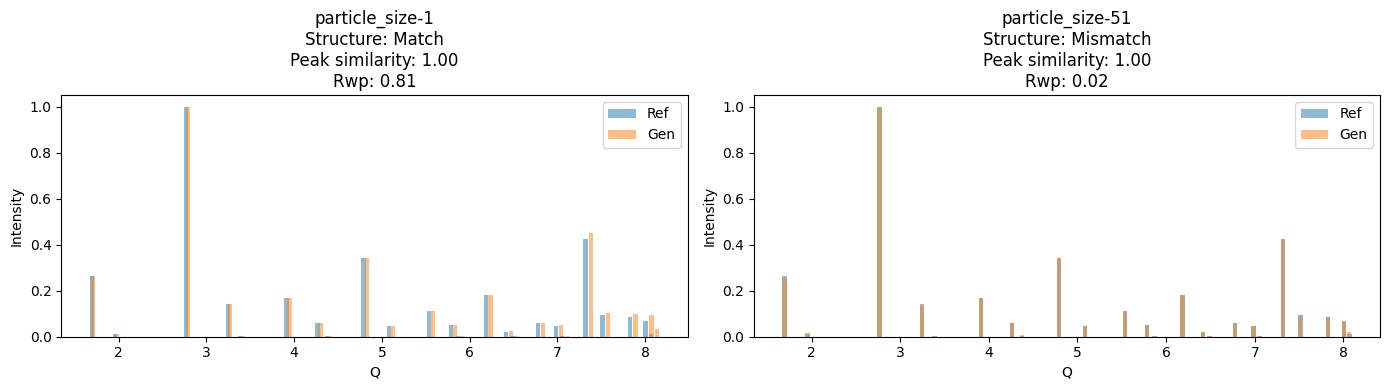

In [40]:
plot_experiment_results(res)

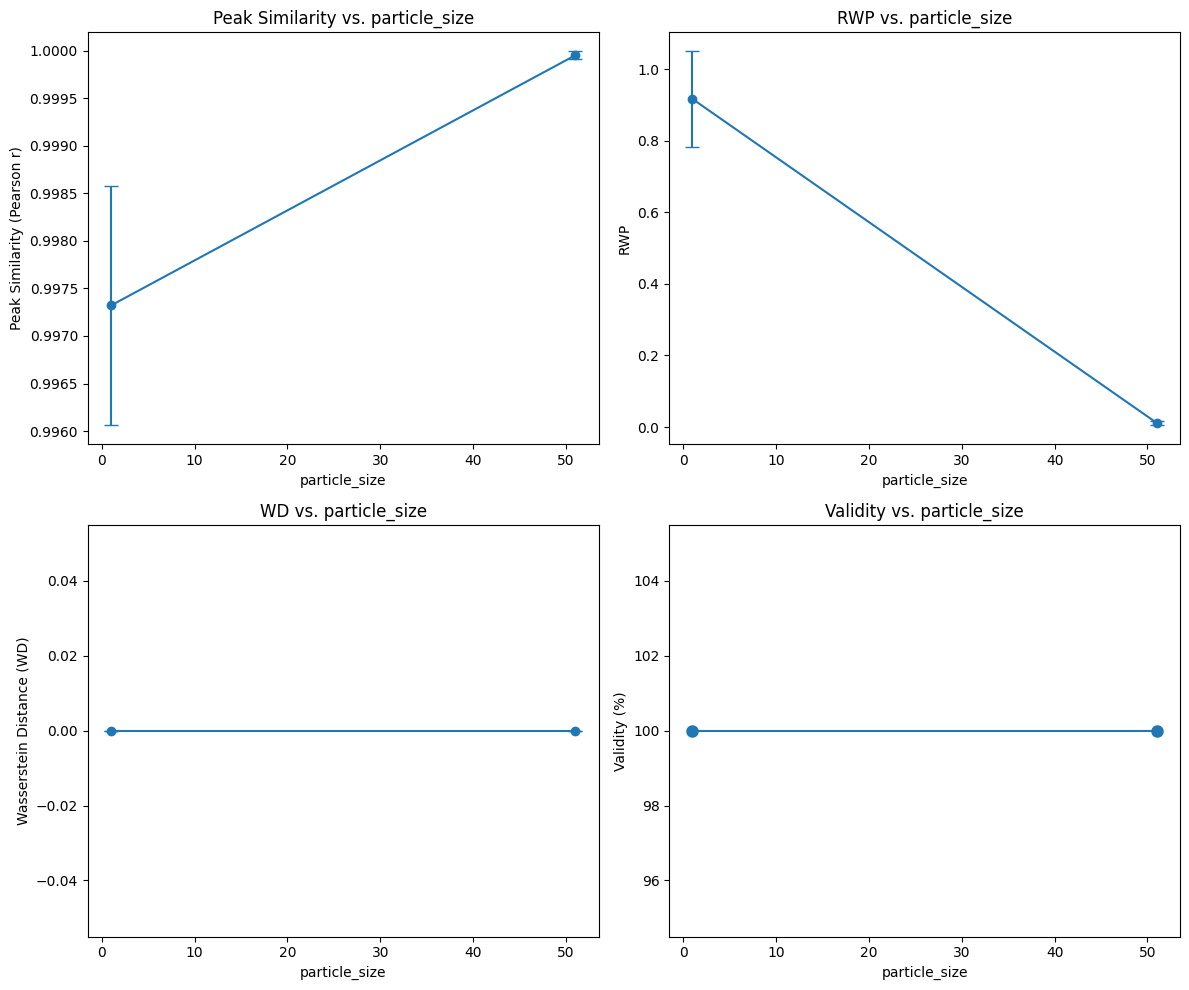

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def plot_experiment_metrics_vs_parameter(results, param_name):
    """
    Plot multiple metrics from the experiment as a function of a given parameter.
    
    Metrics plotted:
        - Peak Similarity (Pearson correlation)
        - RWP (Residual weighted profile)
        - WD (Wasserstein Distance)
        - Validity (% of generated CIFs that pass validity tests)
    
    Args:
        results (dict): Dictionary returned by the experiment() function.
        param_name (str): The parameter name to plot against (e.g., "particle_size").
    """
    param_vals = []
    peak_sim_means = []
    peak_sim_stds = []
    rwp_means = []
    rwp_stds = []
    wd_means = []
    wd_stds = []
    valid_percents = []
    
    # Loop over each parameter combination.
    for combo_key, exp_list in results.items():
        # Assume all repeats for this combo share the same parameter value.
        param_val = exp_list[0]['params'][param_name]
        param_vals.append(param_val)
        
        # Gather the metric values over the repeats.
        peak_sims = [exp['peak_similarity'] for exp in exp_list]
        rwp_vals = [exp['rwp'] for exp in exp_list]
        wd_vals = [exp['wd'] for exp in exp_list]
        # Validity is a boolean; compute percentage of True values.
        valid_frac = np.mean([1 if exp['val'] else 0 for exp in exp_list]) * 100
        
        peak_sim_means.append(np.mean(peak_sims))
        peak_sim_stds.append(np.std(peak_sims))
        rwp_means.append(np.mean(rwp_vals))
        rwp_stds.append(np.std(rwp_vals))
        wd_means.append(np.mean(wd_vals))
        wd_stds.append(np.std(wd_vals))
        valid_percents.append(valid_frac)
    
    # Convert to arrays and sort by parameter value.
    param_vals = np.array(param_vals)
    peak_sim_means = np.array(peak_sim_means)
    peak_sim_stds = np.array(peak_sim_stds)
    rwp_means = np.array(rwp_means)
    rwp_stds = np.array(rwp_stds)
    wd_means = np.array(wd_means)
    wd_stds = np.array(wd_stds)
    valid_percents = np.array(valid_percents)
    
    sort_idx = np.argsort(param_vals)
    sorted_param_vals = param_vals[sort_idx]
    sorted_peak_sim_means = peak_sim_means[sort_idx]
    sorted_peak_sim_stds = peak_sim_stds[sort_idx]
    sorted_rwp_means = rwp_means[sort_idx]
    sorted_rwp_stds = rwp_stds[sort_idx]
    sorted_wd_means = wd_means[sort_idx]
    sorted_wd_stds = wd_stds[sort_idx]
    sorted_valid_percents = valid_percents[sort_idx]
    
    # Create a 2x2 subplot for the different metrics.
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    
    # Plot Peak Similarity.
    axs[0].errorbar(sorted_param_vals, sorted_peak_sim_means, yerr=sorted_peak_sim_stds,
                    fmt='o-', capsize=5)
    axs[0].set_xlabel(param_name)
    axs[0].set_ylabel("Peak Similarity (Pearson r)")
    axs[0].set_title("Peak Similarity vs. " + param_name)
    
    # Plot RWP.
    axs[1].errorbar(sorted_param_vals, sorted_rwp_means, yerr=sorted_rwp_stds,
                    fmt='o-', capsize=5)
    axs[1].set_xlabel(param_name)
    axs[1].set_ylabel("RWP")
    axs[1].set_title("RWP vs. " + param_name)
    
    # Plot WD.
    axs[2].errorbar(sorted_param_vals, sorted_wd_means, yerr=sorted_wd_stds,
                    fmt='o-', capsize=5)
    axs[2].set_xlabel(param_name)
    axs[2].set_ylabel("Wasserstein Distance (WD)")
    axs[2].set_title("WD vs. " + param_name)
    
    # Plot Validity (%).
    axs[3].plot(sorted_param_vals, sorted_valid_percents, 'o-', markersize=8)
    axs[3].set_xlabel(param_name)
    axs[3].set_ylabel("Validity (%)")
    axs[3].set_title("Validity vs. " + param_name)
    
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------------
# Example usage:
# Assume you have already run the experiment with a params_dict that varies, say, "particle_size".
# For instance:
#
# params_dict = {
#     "particle_size": [20, 50, 100],
#     "base_fwhm_range": [(0.1, 0.1)],
#     "peak_asymmetry_range": [(0.9, 0.9)],
#     "noise_range": [(0.01, 0.01)],
#     "preferred_orientation_range": [(0.9, 0.9)],
#     "chebychev_coeff_range": [(-0.1, -0.1)],
#     "chebychev_order": [3]
# }
#
# results = experiment(sample_cif, params_dict, model, n_repeats=3)
#
# Now, to plot all the metrics versus "particle_size":
plot_experiment_metrics_vs_parameter(res, "particle_size")


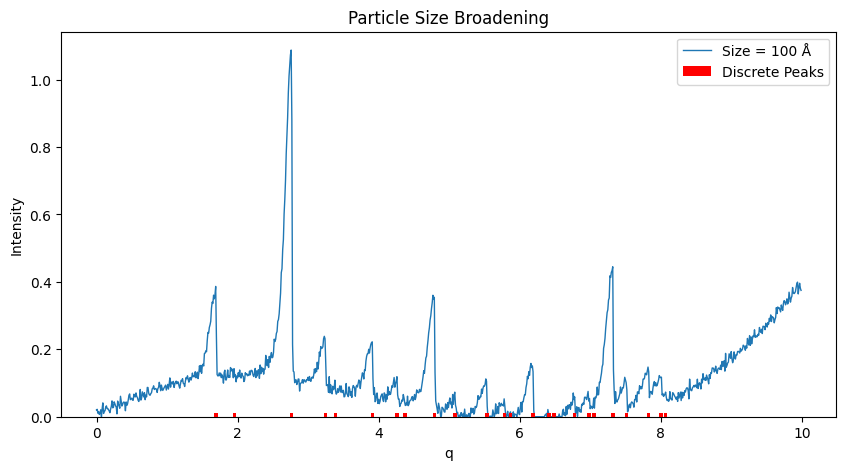

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
pxrd = pxrd_from_cif(
    sample_cif, 
    particle_size=100,
    base_fwhm_range=(0.1, 0.1),
    peak_asymmetry_range=(0.9, 0.9),
    noise_range=(0.01, 0.01),
    preferred_orientation_range=(0.9,0.9),
    chebychev_norm_coeff_range=(0.1, 0.1),
    chebychev_order=3,
    debug=True)
ax.plot(pxrd['q'], pxrd['iq'], lw=1, label=f"Size = {ps} Å")
q_disc = pxrd['q_disc'][0]
iq_disc = pxrd['iq_disc'][0]
ax.bar(q_disc, np.ones_like(iq_disc)*0.01, color='red', width=0.05, zorder=5, label="Discrete Peaks")
ax.set_title("Particle Size Broadening")
ax.set_xlabel("q")
ax.set_ylabel("Intensity")
ax.legend()

plt.show()

cond_vec = torch.from_numpy(pxrd['iq']).unsqueeze(0).to('cuda')

In [129]:
generated = model.generate_custom(
    idx=torch.tensor([START_ID]).unsqueeze(0).to('cuda'),
    max_new_tokens=3076,
    cond_vec=cond_vec,
    start_indices_batch=[[0]],
#     composition_string=composition_string if composition_string != "" else None,
#     spacegroup_string=spacegroup_string,
#     cell_a_string=f'{cell_a_value:.4f}' if cell_a_value else None,
#     cell_b_string=f'{cell_b_value:.4f}' if cell_b_value else None,
#     cell_c_string=f'{cell_c_value:.4f}' if cell_c_value else None,
#     cell_alpha_string=f'{cell_alpha_value:.4f}' if cell_alpha_value else None,
#     cell_beta_string=f'{cell_beta_value:.4f}' if cell_beta_value else None,
#     cell_gamma_string=f'{cell_gamma_value:.4f}' if cell_gamma_value else None,
#     atoms_string_list=atoms if len(atoms) > 0 else None,
#     exclude_elements=[el for (el,inact) in inactive_elements.items() if inact],
).cpu().numpy()

# Remove padding
generated = [ids[ids != PADDING_ID] for ids in generated]

cif_string_gen = DECODE(generated[0])
# Fix P1 issues if needed
cif_string_gen = replace_symmetry_loop_with_P1(cif_string_gen)
spacegroup_symbol = extract_space_group_symbol(cif_string_gen)
if spacegroup_symbol != "P 1":
    cif_string_gen = reinstate_symmetry_loop(cif_string_gen, spacegroup_symbol)

In [130]:
pxrd_clean = pxrd_from_cif(
    sample_cif,
#     peak_asymmetry_range=(0.9, 0.9),
)
pxrd_gen = pxrd_from_cif(
    cif_string_gen, 
#     particle_size=100,
#     base_fwhm_range=(0.1, 0.1),
#     peak_asymmetry_range=(0.9, 0.9),
#     noise_range=(0.01, 0.01),
#     preferred_orientation_range=(0.9,0.9),
#     chebychev_norm_coeff_range=(0.1, 0.1),
#     chebychev_order=3,
#     debug=True
)

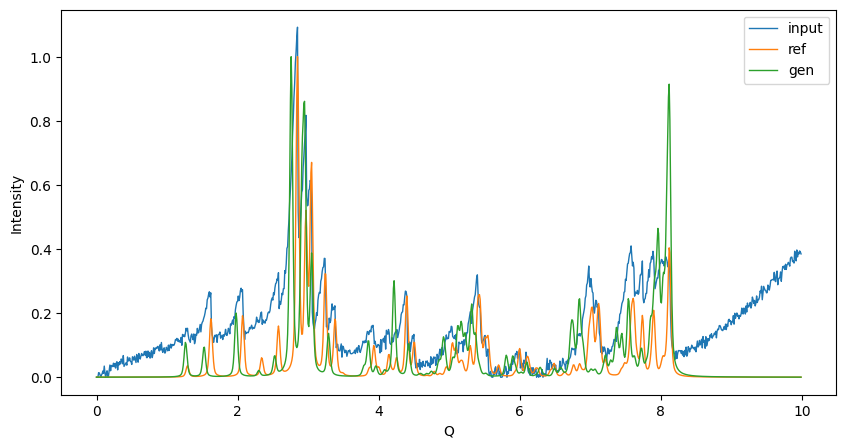

In [131]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(pxrd['q'], pxrd['iq'], lw=1, label=f"input")
ax.plot(pxrd_clean['q'], pxrd_clean['iq'], lw=1, label=f"ref")
ax.plot(pxrd_gen['q'], pxrd_gen['iq'], lw=1, label=f"gen")
ax.set_xlabel("Q")
ax.set_ylabel("Intensity")
ax.legend()
plt.show()

In [132]:
structure_ref = Structure.from_str(sample_cif, fmt='cif')
structure_gen = Structure.from_str(cif_string_gen, fmt='cif')

In [133]:
structure_ref

In [134]:
structure_gen

## Size

In [ ]:
for ps in [10, 50, 100]:
    